# Pymaceuticals Inc.
---

### Analysis
1. The total number of time points for all mice tested for both 
Capomulin and Ramicane are significantly higher than other drugs. This 
can prove that the two drugs have been effective during the testing. 
2. The total number of time points for all mice tested for Ketapril, 
Naftisol, Zoniferol, Placebo, Stelasyn, Ceftamin and Influbinol are 
almost equal to each other as the graph shows a slight difference 
between the time points. That shows us that these drugs were somewhat 
effective, however, they did not fully treat the tumour.  
3. The total number of time points for all mice tested for Propriva
is lower than the other drugs which mean that it was not effective. 
4. The male distribution in the study is higher by 2% than the female.
5.  The distribution of the final tumour volume for all mice is higher in the 
Infubionl treatment group. 
6. The outlier can indicate an extreme value or it could mean an error therefor
it should be investigated. 
7. for the (mouse_id = "l509") that was treated with Capomulin, the line graph 
shows us that the tumour volume has increased up to 48 times on 20th day of the treatment, 
then decreased about 44 times in size for about 5 days later, it increased again to about 44.5 in 
the 30th day of the treatment and decreased to almost 40 times in size in about 30.5 days of the treatment 
and increased again to around 41.5 times in size. This indicated that there 
were ups and downs with the Capomulin treatment however it was effective after all. 
8. for the Capoulin regimen the average tumour volume increased as the weight of the mouse increased.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sb 
import scipy as lingregress 

In [2]:
# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
# Combine the data into a single dataset
combine_data = pd.merge( study_results,mouse_metadata, on="Mouse ID", how= "left" )
# Display the data table for preview

combine_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
unique_miceid = len(combine_data["Mouse ID"].unique()) 
unique_miceid

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice= combine_data.loc[combine_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [8]:
duplicate_mouse_data = combine_data.loc[combine_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data["Mouse ID"].isin(dup_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
count_mice_num = len(clean_data["Mouse ID"].unique())
count_mice_num

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stat_mean = clean_data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
tumor_stat_median = clean_data.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
tumor_stat_var = clean_data.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
tumor_stat_std = clean_data.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
tumor_stat_sem =clean_data.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
 
stat_df = ({'Mean Tumor Volum': tumor_stat_mean,
            'Median Tumor Volume': tumor_stat_median,
             'Tumor Volume Variance': tumor_stat_var,
              'Tumor Volume Std. Dev': tumor_stat_std,
              'Tumor Volume Std. Err.': tumor_stat_sem})

stat_df = pd.DataFrame(stat_df)

stat_df

,Mean Tumor Volum,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
tumor_stat_agg = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
tumor_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
grouped_df = clean_data.groupby(['Drug Regimen'])['Timepoint'].count()
sorted_df = grouped_df.sort_values()
sorted_df

Drug Regimen
Propriva     148
Ceftamin     178
Infubinol    178
Placebo      181
Stelasyn     181
Zoniferol    182
Naftisol     186
Ketapril     188
Ramicane     228
Capomulin    230
Name: Timepoint, dtype: int64

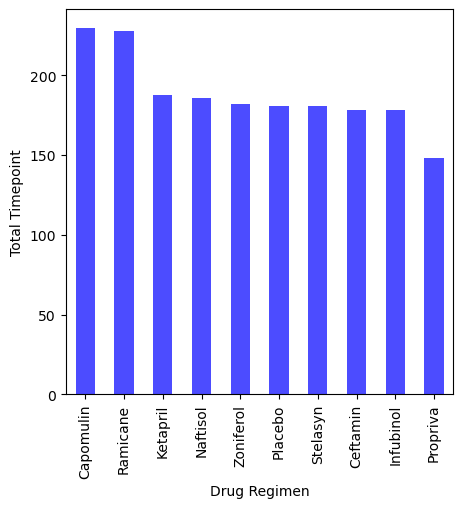

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_df = clean_data.groupby(['Drug Regimen'])['Timepoint'].count()
sorted_df = grouped_df.sort_values(ascending = False)
pd_bar = sorted_df.plot(kind='bar', figsize=(5,5), color='b', alpha=0.7)
pd_bar.set_xlabel('Drug Regimen')
pd_bar.set_ylabel('Total Timepoint')
plt.show()

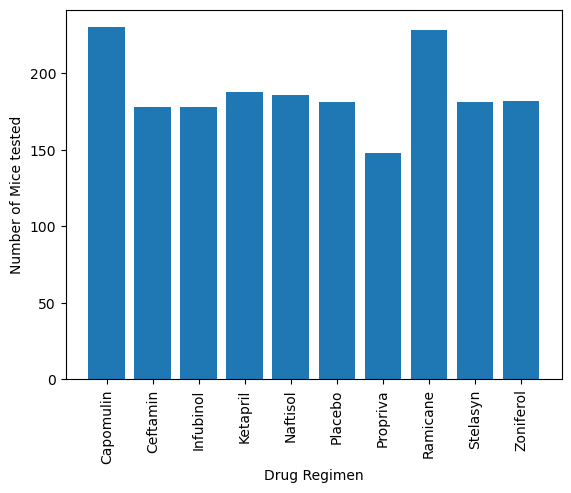

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
grouped_df = clean_data.groupby(['Drug Regimen'])['Mouse ID'].count()
sorted_df = grouped_df.sort_values(ascending = True)
plt.bar(grouped_df.index, grouped_df.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice tested')
plt.show()

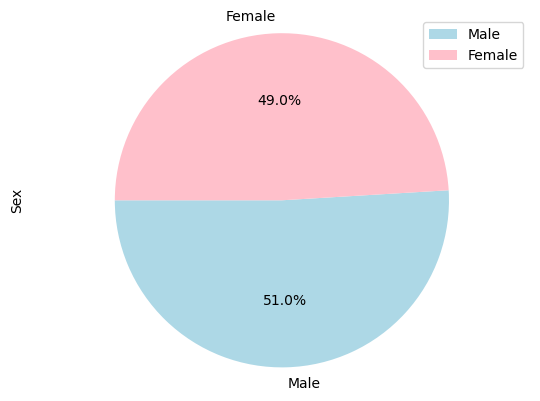

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dist_data = clean_data.Sex.value_counts()
labels = ["Female", "Male"]
colors = ['lightblue', 'pink']
dist_data.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=colors)
plt.axis('equal')
plt.legend()
plt.show()

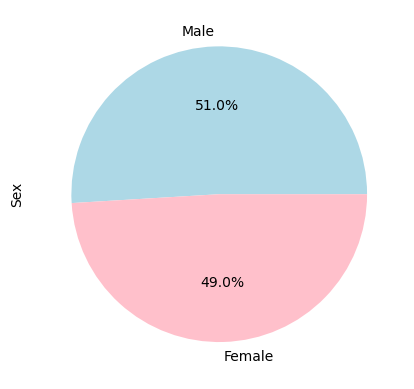

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist_data = clean_data.Sex.value_counts()
colors = ['lightblue', 'pink']
plt.pie(dist_data, labels=dist_data.index.values, autopct='%1.1f%%', colors=colors)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_vol = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
final_vol = final_vol.reset_index()
final_vol

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [20]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = final_vol.merge(clean_data, on=['Mouse ID','Timepoint'],how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
treatment_names = merged_df["Drug Regimen"].unique()
treatment_names

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [22]:
treatment_names = merged_df["Drug Regimen"].unique()
Tumer_vol_data = []

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
  

# Create empty list to fill with tumor vol data (for plotting)
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Tumer_vol_data = []

for treatment in treatment_names: 
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    Tumer_vol_data.append(final_tumor_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


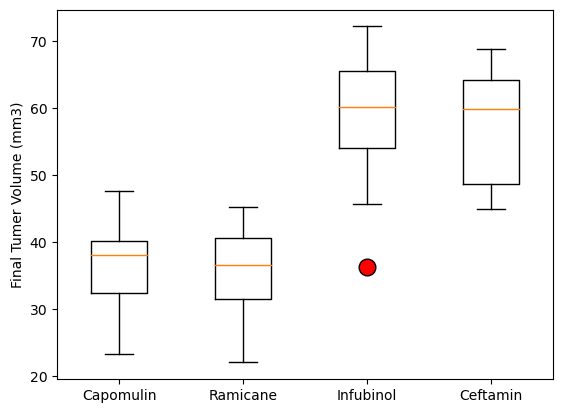

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
circle_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(Tumer_vol_data, labels = treatment_names, flierprops = circle_out )
#plt.xticks(range(1, len(treatment_names) + 1), treatment_names)
plt.ylabel('Final Tumer Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [25]:
mouse_id = "l509"

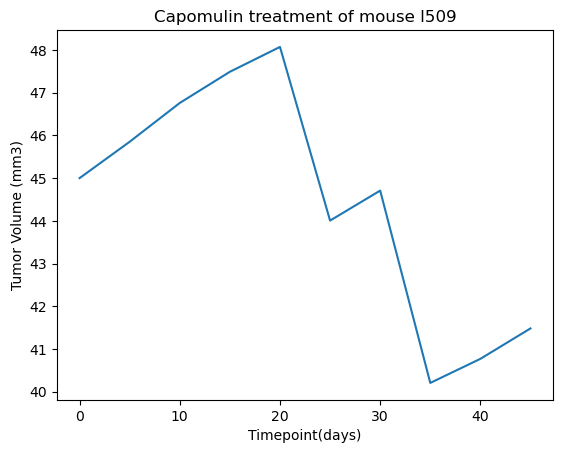

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
locate_cap = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = locate_cap.loc[locate_cap['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()

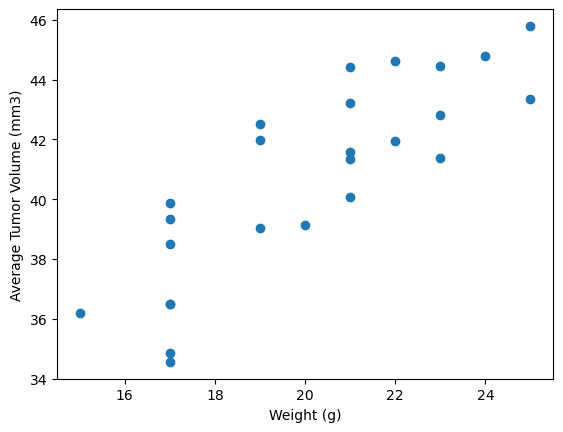

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average = locate_cap.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [28]:
capomulin_average = locate_cap.groupby(['Mouse ID']).mean()
capomulin_average.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


In [29]:
weight_df = capomulin_average["Weight (g)"]
weight_df.head()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
Name: Weight (g), dtype: float64

In [31]:
Tumor_df = capomulin_average["Tumor Volume (mm3)"]
Tumor_df.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [32]:
weight_df_farme = weight_df.to_frame()

In [39]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(res)

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


In [40]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.708857


In [41]:
weight_df_farme = weight_df.to_frame()
weight_df_farme 

,Weight (g)
Mouse ID,
b128,22.0
b742,21.0
f966,17.0
g288,19.0
g316,22.0
i557,24.0
i738,20.0
j119,23.0
j246,21.0


In [35]:
capomulin_average

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [42]:
pe_fit = pe_slope *weight_df_farme + pe_int

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


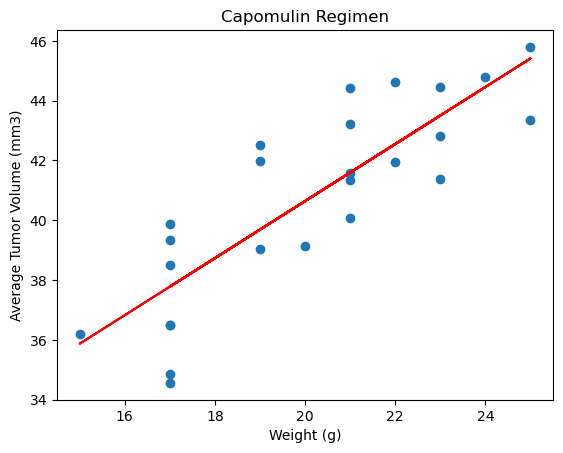

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(stats.pearsonr(weight_df,Tumor_df))
plt.scatter(weight_df,Tumor_df)
r = np.corrcoef(weight_df,Tumor_df)[0, 1]
plt.plot(weight_df_farme,pe_fit, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Regimen')
capomulin_average.corr()
plt.show()